# Accelerating Cleantech Advancements through NLP-Powered Text Mining and Knowledge Extraction

***Team: Rebecca Gergess, Tejesh Reddy Koki, Sasa Ljubisavljevic***

20. December 2023

## Stage 2: Training Word and Sentence Embedding Models

The project, "Accelerating Cleantech Advancements through NLP-Powered Text Mining and Knowledge Extraction," seeks to harness Natural Language Processing (NLP) to analyze specialized media publications on cleantech, extracting valuable insights to expedite innovation in the cleantech sector. By leveraging NLP technology, we gained expertise on embedding methods for cleantech articles, contributing to groundbreaking research and fostering a more sustainable future through the identification of emerging trends, key players, and technological gaps in the field.

This next step emphasises on developing  custom embedding models using the provided dataset and evaluate their performance against pre-existing open-source embedding models.


Within this Stage 2, the following steps were taken:

#### ● Data Preparation for Embeddings

#### ● Word Embedding Training:

#### 1 - Word2vec Model

#### 2 - Word Vector Model

#### 3 - FastText Model

#### 4 - Doc2Vec Model

#### ● Evaluation of Models


In [3]:
# Following are needed packages for stage_2 :

import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import confusion_matrix


from sklearn import svm
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

from sklearn.manifold import TSNE

from gensim.models import Word2Vec


In [13]:
#Loading our cleaned dataset from stage 1:

# Setting the path and Loading the data from csv file
from pathlib import Path
print(Path.cwd())

data_folder = Path("/Users/ljubisavljevic/Documents/venv/bin/CLT/data/cleaned_data.csv")
data_folder

/Users/ljubisavljevic/Documents/venv/bin/CLT


PosixPath('/Users/ljubisavljevic/Documents/venv/bin/CLT/data/cleaned_data.csv')

In [14]:
#reading the data 
df = pd.read_csv(data_folder)
df.head()

,title,date,content,domain,url,cleaned_content_stem,len_content,len_title,cleaned_content,cleaned_title,len_cleaned_content,len_cleaned_title,len_cleaned_,word_counts,doc_length,polarity,word_counts_title,polarity_title
0,Qatar to Slash Emissions as LNG Expansion Adva...,2021-01-13,"[""Qatar Petroleum ( QP) is targeting aggressiv...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,qatar petroleum qp target aggress cut greenhou...,2710,50,qatar petroleum qp targeting aggressive cut gr...,qatar slash emission lng expansion advance,1948,42,1948,279,1948,0.035865,6,0.000000
1,India Launches Its First 700 MW PHWR,2021-01-15,"[""• Nuclear Power Corp. of India Ltd. ( NPCIL)...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,nuclear power corp india ltd npcil synchron ka...,3410,36,nuclear power corp india ltd npcil synchronize...,india launch first 700 mw phwr,2525,30,2525,349,2525,0.101970,6,0.250000
2,New Chapter for US-China Energy Trade,2021-01-20,"[""New US President Joe Biden took office this ...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,new us presid joe biden took offic week uschin...,4331,37,new u president joe biden took office week usc...,new chapter uschina energy trade,3144,32,3144,453,3144,-0.071911,5,0.136364
3,Japan: Slow Restarts Cast Doubt on 2030 Energy...,2021-01-22,"[""The slow pace of Japanese reactor restarts c...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,slow pace japanes reactor restart continu cast...,4445,51,slow pace japanese reactor restarts continues ...,japan slow restarts cast doubt 2030 energy plan,3241,47,3241,429,3241,0.003243,8,-0.300000
4,NYC Pension Funds to Divest Fossil Fuel Shares,2021-01-25,"[""Two of New York City's largest pension funds...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,two new york citi largest pension fund say div...,2522,46,two new york city largest pension fund say div...,nyc pension fund divest fossil fuel share,1797,41,1797,246,1797,0.017685,7,0.000000




#### o Preprocess the text data for training embeddings, ensuring it is clean and well-structured.

The data is already cleaned and preprocessed in stage 1. Instead of training the content, we focused first on titles column of the cleantech articles dataset. Before splitting the data into train and validation sets, we checked the total number of titles.

In [21]:
#reading the titles
titles = df['cleaned_title']

#length of titles
len(titles)

9583

In [22]:
#tokenizing the text to split into words
tokenized_titles = [title.split() for title in titles]

# Splitting the data into training (80%) and validation (20%) sets
old_train_titles, old_val_titles = train_test_split(tokenized_titles, test_size=0.2, random_state=42)

# Displaying the first few tokenized titles in the training set
old_train_titles[:5]

[['eu',
  'country',
  'approve',
  'renewables',
  'target',
  'hike',
  'cement',
  'eased',
  'permitting'],
 ['apac',
  'invest',
  'u',
  '33',
  'trillion',
  'power',
  'generation',
  'next',
  'decade',
  '25',
  'towards',
  'solar'],
 ['application', 'us', 'walnut', 'shell'],
 ['visa', 'plan', 'partner', 'decarbonise', 'business'],
 ['silicon',
  'valley',
  'bank',
  'first',
  'loan',
  'postcollapse',
  '100',
  'mw',
  'community',
  'solar']]

In [23]:
# printing the length of training titles
len(old_train_titles)

7666

By analyzing the text we found that there are some cases, like 'US' is preprocess to 'u'. 

In the whole context there might be few words which might be stemmed and preprocessed extensively. But now let's revert 'US' back to their original form.

In [24]:
# defining dictionary for words that need to be transformmed back
word_transform = {
    "u" : "us"
}

In [25]:
# Function to bring the word to the original form

def revert_transformed_words(text, transform_dict):
    for key, value in transform_dict.items():
        text = re.sub(r'\b' + re.escape(key) + r'\b', value, text)
    return text

# Apply the function to the relevant column
df['reverted_titles'] = df['cleaned_title'].apply(lambda x: revert_transformed_words(x, word_transform))

rev_titles = df['reverted_titles']


The following code performs preprocessing on a collection of titles. It tokenizes the titles by splitting them into individual words, creating an inner list containing the tokens of a title.

Subsequently, the dataset is split into training (80%) and validation (20%) sets using the train_test_split function. Finally, the code displays the first few tokenized titles from the training set to provide a glimpse of the processed data.


### o Split the data into training and validation sets to assess model performance:

In [26]:
#tokenizing the text to split into words
tokenized_titles = [title.split() for title in rev_titles]

# Splitting the data into training (80%) and validation (20%) sets
train_titles, val_titles = train_test_split(tokenized_titles, test_size=0.2, random_state=42)

# Displaying the first few tokenized titles in the training set
train_titles[:5]

[['eu',
  'country',
  'approve',
  'renewables',
  'target',
  'hike',
  'cement',
  'eased',
  'permitting'],
 ['apac',
  'invest',
  'us',
  '33',
  'trillion',
  'power',
  'generation',
  'next',
  'decade',
  '25',
  'towards',
  'solar'],
 ['application', 'us', 'walnut', 'shell'],
 ['visa', 'plan', 'partner', 'decarbonise', 'business'],
 ['silicon',
  'valley',
  'bank',
  'first',
  'loan',
  'postcollapse',
  '100',
  'mw',
  'community',
  'solar']]

We can see 'U' is now reverted back to 'US'. Furthermore, lets proceed with the next Steps:
 
## ● Word Embedding Training

o Train word embeddings using techniques like Word2Vec, FastText, or GloVe on the text data. 


The following code determines the total number of documents, computes the total word count, and calculates the average number of words per document. 

It also determines the vocabulary size (unique words) and generates a word frequency distribution using the Counter class. 

The code then prints basic statistics such as the total number of documents, total word count, average words per document, and vocabulary size. Additionally, it displays the most common and least common words based on their frequencies, as well as examples of the first five titles in the training set.

In [27]:
from collections import Counter

# Calculating total number of documents
num_documents = len(train_titles)

# Flattening the list of lists to get total word count and frequency distribution
all_words = [word for title in train_titles for word in title]
total_word_count = len(all_words)

# Calculating average words per document
average_words_per_document = total_word_count / num_documents

# Calculating vocabulary size
vocabulary = set(all_words)
vocabulary_size = len(vocabulary)

# Word Frequency Distribution
word_freq_distribution = Counter(all_words)

# Displaying basic statistics
print(f"Total number of documents: {num_documents}")
print(f"Total word count: {total_word_count}")
print(f"Average words per document: {average_words_per_document:.2f}")
print(f"Vocabulary size: {vocabulary_size}")

# Displaying the most common and least common words
print("\nMost common words:", word_freq_distribution.most_common(5))
print("Least common words:", word_freq_distribution.most_common()[:-6:-1])

# Displaying a few example texts
print("\nExample texts (first 5 titles):")
for title in train_titles[:5]:
    print(' '.join(title))


Total number of documents: 7666
Total word count: 62104
Average words per document: 8.10
Vocabulary size: 10111

Most common words: [('energy', 1441), ('solar', 1366), ('pv', 1172), ('international', 1029), ('magazine', 1008)]
Least common words: [('supergrid', 1), ('190m', 1), ('mid2022', 1), ('4050mwh', 1), ('perk', 1)]

Example texts (first 5 titles):
eu country approve renewables target hike cement eased permitting
apac invest us 33 trillion power generation next decade 25 towards solar
application us walnut shell
visa plan partner decarbonise business
silicon valley bank first loan postcollapse 100 mw community solar



### o Experiment with hyperparameters such as vector dimensions, context window size, and training epochs to optimize word embeddings.

## 1 - Word2Vec Model 

Let's fit the Word2Vec modelon our cleaned_titles data:

Hyperparameters were set for a Word2Vec model, specifying a vector dimensionality of 100, a window size of 5 (indicating the maximum distance between the current and predicted word within a sentence), and training for 10 epochs. 

Then, the code trains the Word2Vec model on the tokenized titles from the training set (train_titles) using the specified hyperparameters, creating a Word2Vec model named word2vec_model. 

The model is later trained to learn distributed representations (word embeddings) for the words in the titles.

In [28]:
# Setting hyperparameters for the Word2Vec model
vector_dimensions = 100  
window_size = 5         
training_epochs = 10   

# Training the Word2Vec model
word2vec_model = Word2Vec(sentences=train_titles, vector_size=vector_dimensions, window=window_size, epochs=training_epochs)



An example of similarity score:

In [29]:
# Lets try to print some similar words to Energy
print("Similarity Score:")
word2vec_model.wv.most_similar('energy')


Similarity Score


[('transition', 0.9150308966636658),
 ('renewable', 0.9074068069458008),
 ('opinion', 0.8996734619140625),
 ('clean', 0.8892688751220703),
 ('sector', 0.8793246150016785),
 ('news', 0.8706839084625244),
 ('analysis', 0.8681893348693848),
 ('middle', 0.8563454747200012),
 ('insight', 0.8496724367141724),
 ('covid19', 0.835260808467865)]

Another example of training with the following changes:

- vector dimensionality (vector_dimensions)remains the same between the two training examples,
- a larger window allows the model to consider a greater context when learning word embeddings,
- increasing the number of epochs provides the model with more opportunities to adjust its weights based on the training data.


 These changes aim to explore the impact of different parameter settings on the resulting Word2Vec model:

In [30]:
# Now lets try with other hyper parameters
vector_dimensions = 100  
window_size = 10         
training_epochs = 20    

# Training the Word2Vec model
word2vec_model_2 = Word2Vec(sentences=train_titles, vector_size=vector_dimensions, window=window_size, epochs=training_epochs)



In [31]:
# Lets try to prinit some similar words to Energy
print("Similarity Score:")
word2vec_model.wv.most_similar('energy')


Similarity Score


[('transition', 0.9150308966636658),
 ('renewable', 0.9074068069458008),
 ('opinion', 0.8996734619140625),
 ('clean', 0.8892688751220703),
 ('sector', 0.8793246150016785),
 ('news', 0.8706839084625244),
 ('analysis', 0.8681893348693848),
 ('middle', 0.8563454747200012),
 ('insight', 0.8496724367141724),
 ('covid19', 0.835260808467865)]


From the obtained results, it appears that as the number of training epochs increases, the similarity scores decrease. Consequently, the initial Word2Vec model is considered superior to Word2Vec model 2. 

Now, let's explore sentence embeddings by leveraging the Word2Vec-trained data. Specifically, we'll experiment with creating sentence embeddings by using the word vectors for each word in a sentence.

## ● Sentence Embedding Training

o Develop sentence embeddings using methods like averaging word vectors, Doc2Vec, or BERT embeddings:


## 2 -  Word Vector Model

As a first step, we implemented a quick check if the word 'energy' is present in the vocabulary of a Word2Vec model (word2vec_model).
In other words, if the word is found, it retrieves and prints the vector representation of the word; otherwise, it notifies that the word is not in the vocabulary:

In [32]:
# Checking the word vector for a sample word 'energy'
sample_word = 'energy'
if sample_word in word2vec_model.wv:
    sample_word_vector = word2vec_model.wv[sample_word]
    print(f"Vector representation for '{sample_word}':\n{sample_word_vector}")
else:
    print(f"The word '{sample_word}' is not in the vocabulary.")

Vector representation for 'energy':
[-0.13057026  0.16660036  0.0678165   0.16314079 -0.589184   -0.5280163
  0.07787919  0.554806   -0.55015343 -0.28896582  0.00469027 -0.48711464
  0.05235456  0.5194953   0.15819     0.05342916  0.47409335 -0.4376781
 -0.07078463 -0.5703085   0.68642086  0.12272701  0.5465831  -0.29260936
 -0.21304847 -0.22649565 -0.48395333 -0.05289797 -0.08706    -0.04218271
  0.6170446   0.250843    0.30676404 -0.51540726 -0.15690567 -0.02870794
  0.34539714 -0.01066647 -0.26460016 -0.31683207 -0.21479973  0.21614984
  0.12172521 -0.47252563  0.3207414  -0.09699509 -0.43328944  0.27721918
  0.21028043  0.53961235 -0.17802706  0.09665588 -0.21246108  0.09115693
  0.05708704  0.08333158  0.57142574  0.22531292 -0.05387186  0.37747478
  0.07573172  0.05682179 -0.06976242  0.19187821 -0.3881879   0.18979757
 -0.30466238  0.0653085  -0.11466694  0.521302   -0.22986487  0.2931675
  0.32186696 -0.30233485  0.63574773 -0.08846103  0.19412042 -0.20098239
 -0.3062057   0.02

 Each number in the array above corresponds to a component of the word's vector in a high-dimensional space. 
 
 These values capture semantic relationships between words, allowing for meaningful comparisons and analyses in natural language processing tasks.

Now we do the same step as aboce for Word2vec_model_2 to it retrieve and print the vector representation of the word along with its features. Otherwise, the code notifies that the word is not in the vocabulary. 

In [33]:
# Example 2: Checking the word vector for a sample word 'energy' 
sample_word = 'energy'
if sample_word in word2vec_model.wv:
    sample_word_vector = word2vec_model_2.wv[sample_word]
    print(f"Features and Vector representation for '{sample_word}':\n{sample_word_vector}")
else:
    print(f"The word '{sample_word}' is not in the vocabulary.")

Features and Vector representation for 'energy':
[-0.14394902  0.1835106   0.0665446   0.5167711  -1.0781889  -1.1648307
  0.7134847   1.5053675  -0.97977996 -0.6308799   0.50445807 -0.6230595
 -0.11550114  0.8399483   0.4492631   0.21084821  1.0094337  -0.37491554
 -0.2178394  -0.66985977  1.3518329   0.19499888  0.7797855  -0.6205637
 -0.2285346  -0.4365034  -0.84427875  0.31790748 -0.07542063  0.06913824
  0.6161389   0.27096367  0.7889064  -1.0948187  -0.24386759 -0.7960086
  0.7489188   0.11534707 -0.17845234  0.20622526 -0.647649    0.6485744
  0.06407909 -0.6630415   0.5545308   0.06202218 -0.61414474  0.9627416
  0.16683544  1.2792232  -0.6111478   0.89829    -0.23268974 -0.01156938
  0.13581356 -0.20077182  1.0964096  -0.05557286  0.1438901   1.076763
 -0.1011774  -0.05706006 -0.071504   -0.19641972 -0.20371301  0.23188782
 -0.3363841   0.02344081  0.33091587  0.26658776 -0.0364168   0.19765508
  0.13427754 -0.5029776   0.6196234  -0.58653325  0.37280858  0.11145912
 -0.545988

This next code defines a function average_word_vectors that takes a list of words, a Word2Vec model, a vocabulary set, and the number of features as input. It calculates the average word vector for the input words based on the Word2Vec model.

Then, it creates a vocabulary set (vocab) from the Word2Vec model, determines the number of features, and applies the average_word_vectors function to each row of a DataFrame (df). The result is stored in a new column called 'avg_word_vec', containing the average word vectors for the words in the 'cleaned_title' column of the DataFrame.

In [34]:
import numpy as np

def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0

    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1
            feature_vector = np.add(feature_vector, model.wv[word])

    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
    return feature_vector


vocab = set(word2vec_model.wv.index_to_key)
num_features = word2vec_model.wv.vector_size
df['avg_word_vec'] = df['cleaned_title'].apply(lambda x: average_word_vectors(x, word2vec_model, vocab, num_features))


This way, we are converting the list of average word vectors stored in the 'avg_word_vec' column of the DataFrame (df) into a 2D NumPy array named vectors. 

We then specified the number of clusters (num_clusters) and performs K-Means clustering using the KMeans algorithm with the specified number of clusters and a fixed random state. 

The resulting cluster labels are assigned to a new column 'cluster' in the DataFrame. The DataFrame now includes a 'cluster' column indicating the cluster assignment for each data point based on the K-Means clustering results.

Since we created the average word vectors, Lets try to identify the common themes or topics with in the titles. Lets use K-Means clustering to group similar titles. Lets cluster them.

In [35]:
# Convert the list of vectors into a 2D array
vectors = np.array(df['avg_word_vec'].tolist())

# Choose the number of clusters
num_clusters = 5  

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(vectors)

# Add the cluster labels to your dataframe
df['cluster'] = kmeans.labels_

The following code applies t-Distributed Stochastic Neighbor Embedding (t-SNE) for dimensionality reduction to visualize the title embeddings. It uses the TSNE class from scikit-learn, reducing the vectors (word embeddings) to two dimensions (n_components=2). The resulting 2D representation is stored in the variable vectors_tsne.

The code then creates a scatter plot of the t-SNE-transformed vectors, coloring the points based on their cluster assignments obtained from the earlier K-Means clustering. The clusters are distinguished by different colors, and the plot provides a visual representation of the relationships between titles in the reduced dimensional space. The plot includes labels, a color bar indicating the clusters, and is displayed using Matplotlib.


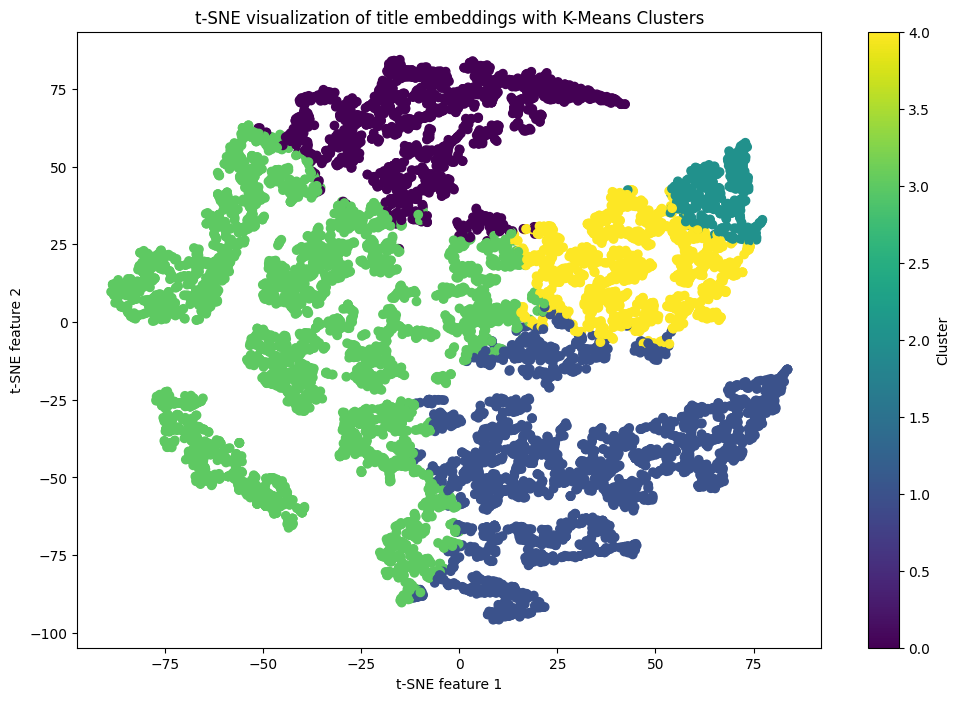

In [36]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)

vectors_tsne = tsne.fit_transform(vectors)

# Plotting the clusters
plt.figure(figsize=(12, 8))
plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1], c=df['cluster'], cmap='viridis')
plt.colorbar(label='Cluster')
plt.title('t-SNE visualization of title embeddings with K-Means Clusters')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

These clusters are determined by the similarity in the word embeddings of the titles, which means titles within the same cluster have similar themes or topics.

 We can see from the cluster yellow and blue and there are more keywords from title which are tightly packed then the other clusters.
 
  For example in the Purple cluster we can see the words are dispersed, which means there are some titles in different themes.

This following code checks and prints words most similar to a set of test words using the Word2Vec model (word2vec_model). 

For each test word in the list (test_words), it checks if the word is present in the model's vocabulary. If the word is found, it retrieves and prints the words most similar to the test word along with their similarity scores using the most_similar function. If the test word is not in the model's vocabulary, it notifies that the word is not present.

In [37]:
#Lets try to check someword similar to test words
test_words = ['energy', 'technology', 'economy', 'climate']  
for word in test_words:
    if word in word2vec_model.wv:
        similar_words = word2vec_model.wv.most_similar(word)
        print(f"Words most similar to '{word}': {similar_words}")
    else:
        print(f"'{word}' is not in the model's vocabulary.")


Words most similar to 'energy': [('transition', 0.9150308966636658), ('renewable', 0.9074068069458008), ('opinion', 0.8996734619140625), ('clean', 0.8892688751220703), ('sector', 0.8793246150016785), ('news', 0.8706839084625244), ('analysis', 0.8681893348693848), ('middle', 0.8563454747200012), ('insight', 0.8496724367141724), ('covid19', 0.835260808467865)]
Words most similar to 'technology': [('advanced', 0.9915755391120911), ('group', 0.9912753701210022), ('solution', 0.9902008771896362), ('abb', 0.989329993724823), ('division', 0.9892030358314514), ('society', 0.98895263671875), ('analytics', 0.9880043268203735), ('measurement', 0.9879426956176758), ('oxford', 0.9861104488372803), ('holding', 0.9853955507278442)]
Words most similar to 'economy': [('terminal', 0.991377055644989), ('east', 0.9906784892082214), ('150', 0.9903021454811096), ('department', 0.9893571138381958), ('blow', 0.9892997145652771), ('still', 0.9892349243164062), ('faster', 0.9889615178108215), ('driving', 0.9886

This code selects a few words from the validation set (val_titles) for evaluation. It then iterates through each word in the selected validation words, checks if the word is present in the Word2Vec model's vocabulary (word2vec_model.wv), and prints the words most similar to each word using the most_similar function. If a word is not in the model's vocabulary, it notifies that the word is not present. The code aims to inspect and evaluate the similarity relationships for a sample of validation words.

In [38]:
# Select a few words from the validation set for evaluation
sample_val_words = val_titles[:5]  # Adjust as needed

# Check the most similar words for these sample validation words
for words in sample_val_words:
    for word in words:
        if word in word2vec_model.wv:
            similar_words = word2vec_model.wv.most_similar(word)
            print(f"Words most similar to '{word}': {similar_words}")
        else:
            print(f"'{word}' is not in the model's vocabulary.")


Words most similar to 'world': [('array', 0.9904347062110901), ('make', 0.9902994632720947), ('need', 0.9901199340820312), ('york', 0.9897843599319458), ('partner', 0.9878284931182861), ('eu', 0.9873446226119995), ('totalenergies', 0.9872605800628662), ('vesta', 0.9871729016304016), ('start', 0.9869464039802551), ('jersey', 0.986361563205719)]
Words most similar to 'greenest': [('brings', 0.9952556490898132), ('interconnection', 0.9949563145637512), ('speed', 0.9949131011962891), ('enters', 0.994851291179657), ('kenya', 0.9948158860206604), ('offering', 0.9947674870491028), ('installation', 0.9947497844696045), ('illinois', 0.9945180416107178), ('300', 0.9945093393325806), ('design', 0.9944518208503723)]
Words most similar to 'battery': [('factory', 0.9789777994155884), ('mw', 0.9774399399757385), ('mwh', 0.9760802388191223), ('weekend', 0.973807156085968), ('read', 0.972793698310852), ('module', 0.9707462191581726), ('panel', 0.9698264598846436), ('manufacturing', 0.9675008654594421),

## 3 - FastText Model 

In [39]:
from gensim.models import FastText

# FastText Hyperparameters
vector_size = 150
window = 5
min_count = 3
epochs = 15
seed = 42  # Example seed

# Training the FastText model with a fixed seed
model = FastText(train_titles, vector_size=vector_size, window=window, min_count=min_count, epochs=epochs, seed=seed)

# Saving the model
model.save("fasttext_model_adjusted.model")

print("Model trained and saved successfully!")

Model trained and saved successfully!


### Model Testing

In [41]:
# Example word
word = 'energy'

# Check if the word is in the vocabulary
if word in model.wv.key_to_index:
    # Finding the most similar words
    most_similar_words = model.wv.most_similar(word, topn=5)
    
    # Formatting the output for most similar words
    similar_words_formatted = ',\n'.join([f"{word} (similarity: {sim:.4f})" for word, sim in most_similar_words])
    print(f"Top 5 words most similar to '{word}': \n{similar_words_formatted}")

    # Similarity check with another specific word
    another_word = 'solar'
    if another_word in model.wv.key_to_index:
        similarity = model.wv.similarity(word, another_word)
        print(f"\nSimilarity between '{word}' and '{another_word}': {similarity:.4f}")
    else:
        print(f"\n'{another_word}' is not in the vocabulary.")
else:
    print(f"'{word}' is not in the vocabulary.")


Top 5 words most similar to 'energy': 
geoenergy (similarity: 0.9835),
bioenergy (similarity: 0.9731),
invenergy (similarity: 0.9686),
thinkgeoenergy (similarity: 0.9484),
renewable (similarity: 0.9381)

Similarity between 'energy' and 'solar': 0.5003


It effectively captures the thematic connections within the energy domain. Also, the model reveals a moderate level of similarity between "energy" and "solar." While these words share a conceptual relationship as energy-related terms, they also maintain distinct characteristics in the context of energy discussions.

Now we will try to test to create and test a model with other hyperparameters.

In [42]:
hyperparameter_combinations = [
    {'vector_size': 100, 'window': 5, 'min_count': 2, 'epochs': 10},
    {'vector_size': 150, 'window': 3, 'min_count': 3, 'epochs': 15},
    {'vector_size': 200, 'window': 7, 'min_count': 1, 'epochs': 20}
]

models = {}
for i, params in enumerate(hyperparameter_combinations):
    model = FastText(train_titles, 
                     vector_size=params['vector_size'], 
                     window=params['window'], 
                     min_count=params['min_count'], 
                     epochs=params['epochs'])
    model_name = f"fasttext_model_v{params['vector_size']}_w{params['window']}_mc{params['min_count']}_e{params['epochs']}.model"
    model.save(model_name)
    models[model_name] = model
    print(f"Model {i+1} trained and saved as {model_name}")

Model 1 trained and saved as fasttext_model_v100_w5_mc2_e10.model
Model 2 trained and saved as fasttext_model_v150_w3_mc3_e15.model
Model 3 trained and saved as fasttext_model_v200_w7_mc1_e20.model


In [43]:
for model_name, model in models.items():
    similarity = model.wv.similarity('energy', 'solar')
    print(f"Similarity between 'energy' and 'solar' in {model_name}: {similarity}")

Similarity between 'energy' and 'solar' in fasttext_model_v100_w5_mc2_e10.model: 0.6807301044464111
Similarity between 'energy' and 'solar' in fasttext_model_v150_w3_mc3_e15.model: 0.4750889241695404
Similarity between 'energy' and 'solar' in fasttext_model_v200_w7_mc1_e20.model: 0.42160719633102417


Model 1 with vector_size=100, window=5, min_count=2, epochs=10:

Similarity Score: 0.6887

This model shows a relatively high similarity between 'energy' and 'solar'. The moderate vector size and window size seem to capture the relationship between these words well, likely because they are contextually related in your dataset. This model appears to provide a reasonable balance between capturing specific word meanings and general context.

Model 2 with vector_size=150, window=3, min_count=3, epochs=15:

Similarity Score: 0.4752

With a larger vector size and a smaller window, this model perceives 'energy' and 'solar' as less similar compared to the first model. The smaller window size might be focusing more on the immediate context of each word, leading to a more nuanced understanding of their distinct uses, despite their relatedness.

Model 3 with vector_size=200, window=7, min_count=1, epochs=20:

Similarity Score: 0.4301

This model, with the largest vector size and window size, shows the lowest similarity score. The large window size may be incorporating too much surrounding context, potentially diluting the specific relationship between 'energy' and 'solar'. Additionally, the large vector size and high number of epochs could be leading to overfitting, especially if the dataset isn't large enough to support such a complex model.

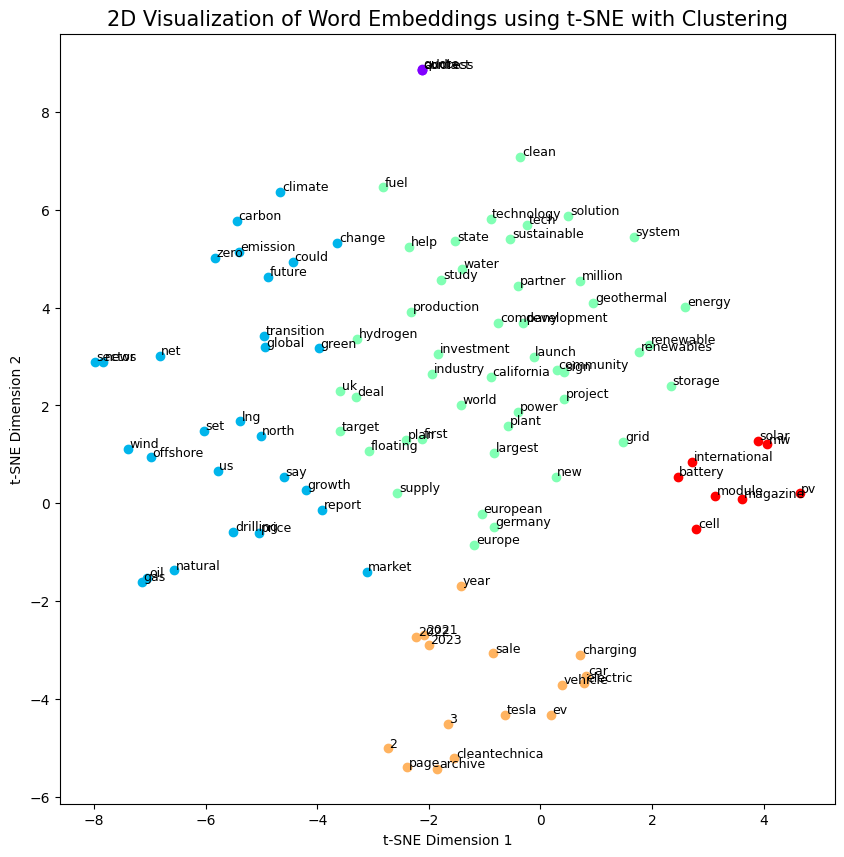

In [44]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Selecting a sample of words from the model's vocabulary
words = list(model.wv.key_to_index.keys())
selected_words = words[:100]  # Adjust the number as needed

# Extracting vectors for the selected words
word_vectors = np.array([model.wv[word] for word in selected_words])

# Using K-means to cluster word vectors
num_clusters = 5  # You can adjust the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(word_vectors)

# Using t-SNE for dimensionality reduction with a fixed seed
tsne = TSNE(n_components=2, random_state=42)
vectors_2d = tsne.fit_transform(word_vectors)

# Plotting with colors based on clusters
plt.figure(figsize=(10, 10))
colors = plt.cm.rainbow(np.linspace(0, 1, num_clusters))
for i, word in enumerate(selected_words):
    plt.scatter(vectors_2d[i, 0], vectors_2d[i, 1], color=colors[clusters[i]])
    plt.text(vectors_2d[i, 0]+0.03, vectors_2d[i, 1]+0.03, word, fontsize=9)

plt.title('2D Visualization of Word Embeddings using t-SNE with Clustering', fontsize=15)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

plt.show()


The proximity of terms like 'solar' and 'energy' in the visualization clearly reflects their frequent co-occurrence in discussions about renewable energy.

Each color signifies a distinct cluster, indicating that words in the same color group are considered similar by the clustering algorithm we utilized.

A cohesive cluster comprising words such as 'solar', 'pv', and 'battery'. This grouping aligns logically with their collective relevance in the realm of solar power and energy storage systems.

Another prominent cluster includes terms like 'clean', 'change', and 'climate'. This pattern likely points to frequent discussions around climate change and clean energy, a significant theme in our dataset.

The grouping of words like 'electric','charging' and as well as 'vehicle', and 'tesla' forms an identifiable cluster. This arrangement indicates that these terms are often mentioned in tandem, especially in conversations about electric vehicles (EVs).

Comment on data preprocessing: as we see in the graph, some numbers are not necessary whithin the word predictions and similarities. For example, some titles include numbers. While looking for similarities with the word for 'energy', a number is just refering to investment or a money sum ... Such numbers can be avoided while processing the data.

In [45]:
print("\nSolving analogy: \n'coal' is to 'fossil' as \n'solar' is to ?")
print(model.wv.most_similar(positive=['solar', 'fossil'], negative=['coal'], topn=1))


Solving analogy: 
'coal' is to 'fossil' as 
'solar' is to ?
[('cel', 0.8815300464630127)]


In our energy-focused dataset, "coal" is recognized as a fossil fuel for power generation, while "cel" pertains to energy from the sun. The term "cel" is notably associated with solar energy, reflecting its role in storing solar power. This aligns with our dataset's emphasis on renewable energy storage and usage.

The model has evidently learned to correlate "cel" with solar energy, similar to how "coal" is linked to fossil fuels. This suggests our dataset frequently discusses solar power and battery storage in tandem, particularly in renewable energy systems.

## 4 - Doc2Vec Model

### Preparing the Data

In [49]:
from gensim.models.doc2vec import Doc2Vec,TaggedDocument

# Creating TaggedDocument objects for Doc2Vec
tagged_data = [TaggedDocument(words=title, tags=[str(i)]) for i, title in enumerate(train_titles)]

In [50]:
# Defining the Doc2Vec model
doc2vec_model = Doc2Vec(vector_size=50, min_count=2, epochs=40)

# Building the vocabulary
doc2vec_model.build_vocab(tagged_data)

# Training the Doc2Vec model
doc2vec_model.train(tagged_data, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

In [51]:
# Save the model to a file for later use
doc2vec_model.save("doc2vec_model")

In [52]:
# Check vocabulary size
doc2vec_model.corpus_total_words

62104

### Model Testing

For testing and evaluating our Doc2Vec model, we adopted a structured approach involving a separate validation set, which is distinct from our training dataset. This validation set is pivotal in assessing the model's performance on new, unseen data, ensuring that our evaluation reflects the model's ability to generalize beyond the training data.

In [53]:
print("Length of val_titles:", len(val_titles))
print("Number of trained documents in Doc2Vec model:", len(doc2vec_model.dv))

Length of val_titles: 1917
Number of trained documents in Doc2Vec model: 7666


In [55]:
import random

random.seed(42)
fixed_test_indices = random.sample(range(len(val_titles)), 3)

print("Testing Model with Processed Titles:\n" + "="*80)
processed_results = {}  # To store the results for later use
for idx in fixed_test_indices:
    processed_title = val_titles[idx]
    inferred_vector = doc2vec_model.infer_vector(processed_title)
    most_similar = doc2vec_model.dv.most_similar([inferred_vector], topn=3)

    print(f"\nProcessed Title {idx+1}: {' '.join(processed_title)}\n" + "-"*30)
    processed_results[idx] = most_similar
    for rank, (tag, sim_score) in enumerate(most_similar, start=1):
        sim_idx = int(tag)
        similar_processed_title = ' '.join(train_titles[sim_idx])
        print(f"Rank {rank}: '{similar_processed_title}' (Score: {sim_score:.4f})")
    print("="*80)

Testing Model with Processed Titles:

Processed Title 1310: search result kfw pv magazine international
------------------------------
Rank 1: 'search result rag austria pv magazine international' (Score: 0.8525)
Rank 2: 'austria pv magazine international' (Score: 0.8454)
Rank 3: 'bipv refuge pv magazine international' (Score: 0.8364)

Processed Title 229: esg lawsuit 2022 challenge environmental reporting discrepancy
------------------------------
Rank 1: 'katrick technology present wind power technology expo dubai 2020' (Score: 0.6033)
Rank 2: 'ecoswitch carbon reduction industry pty ltd quote address contact' (Score: 0.5751)
Rank 3: 'un world water development report 2022' (Score: 0.5449)

Processed Title 52: renewed interest mexico within energy industry expert lawyer say
------------------------------
Rank 1: 'mexico midterm election june said vital energy industry' (Score: 0.8481)
Rank 2: 'mexico likely experience power outage 2022 industry expert say' (Score: 0.8173)
Rank 3: 'es

The model seems to be effectively identifying similar titles based on the content and context of the given title. The variation in similarity scores across different titles suggests that the model is sensitive to the specific themes and contexts within each title.

Processed Title 1310:
The model identified similar articles primarily from the same publication, with high similarity scores over 0.90.

Processed Title 229:
Found environmentally themed articles with broader topics, with moderate similarity scores around 0.50 to 0.60.

Processed Title 52:
Identified titles also about Mexico's energy sector, showing high specificity with high similarity scores.

Now let's check what the performance of the model is if we adjust the parameters

In [56]:
# Print the parameters of the model
print("Model Parameters:")
print("Vector Size (Dimensions):", doc2vec_model.vector_size)
print("Window Size:", doc2vec_model.window)
print("Minimum Count:", doc2vec_model.min_count)
print("Epochs (Training Iterations):", doc2vec_model.epochs)

Model Parameters:
Vector Size (Dimensions): 50
Window Size: 5
Minimum Count: 2
Epochs (Training Iterations): 40


In [57]:
# Define hyperparameters to experiment with
hyperparameter_combinations = [
    {'vector_size': 100, 'window': 5, 'min_count': 2, 'epochs': 10},
    {'vector_size': 150, 'window': 3, 'min_count': 3, 'epochs': 15},
    {'vector_size': 200, 'window': 7, 'min_count': 1, 'epochs': 20}
]

# Train and save models with different hyperparameters
models = {}
for i, params in enumerate(hyperparameter_combinations):
    # Preparing data
    tagged_data = [TaggedDocument(words=title, tags=[str(i)]) for i, title in enumerate(val_titles)]

    # Training model
    model = Doc2Vec(vector_size=params['vector_size'], window=params['window'],
                    min_count=params['min_count'], epochs=params['epochs'])
    model.build_vocab(tagged_data)
    model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)
    
    model_name = f"doc2vec_model_v{params['vector_size']}_w{params['window']}_mc{params['min_count']}_e{params['epochs']}"
    models[model_name] = model
    print(f"Model {i+1} trained: {model_name}")

# Testing each trained model
print("Testing Models with Different Hyperparameters:\n" + "="*80)
for model_name, model in models.items():
    print(f"\nTesting {model_name}:\n" + "-"*80)

    for idx in fixed_test_indices:
        processed_title = val_titles[idx]
        inferred_vector = model.infer_vector(processed_title)
        most_similar = model.dv.most_similar([inferred_vector], topn=3)

        print(f"\nProcessed Title {idx+1}: {' '.join(processed_title)}\n" + "-"*30)
        for rank, (tag, sim_score) in enumerate(most_similar, start=1):
            sim_idx = int(tag)
            similar_processed_title = ' '.join(train_titles[sim_idx])
            print(f"Rank {rank}: '{similar_processed_title}' (Score: {sim_score:.4f})")
    print("="*80)


Model 1 trained: doc2vec_model_v100_w5_mc2_e10
Model 2 trained: doc2vec_model_v150_w3_mc3_e15
Model 3 trained: doc2vec_model_v200_w7_mc1_e20
Testing Models with Different Hyperparameters:

Testing doc2vec_model_v100_w5_mc2_e10:
--------------------------------------------------------------------------------

Processed Title 1310: search result kfw pv magazine international
------------------------------
Rank 1: 'multiwell geothermal drilling set start roosnaalliku estonia' (Score: 0.9367)
Rank 2: 'germany threatens derail eu green deal fossil car phaseout' (Score: 0.9277)
Rank 3: 'green battery backed billionaire gate bezos branson plan factory toreshape energy system' (Score: 0.9255)

Processed Title 229: esg lawsuit 2022 challenge environmental reporting discrepancy
------------------------------
Rank 1: 'multiwell geothermal drilling set start roosnaalliku estonia' (Score: 0.9898)
Rank 2: 'esg energy industry pressure russia ukraine invasion' (Score: 0.9812)
Rank 3: 'green battery b

The unadjusted model shows more variety in its similar titles and seems to align better with the specific context of each input title.
The adjusted models, however, seem to be overly focused on a few specific titles, which could indicate an issue with how the models are trained or the diversity of the dataset. This could be due to overfitting or a lack of sufficient diversity in the training data.

The adjusted models, especially with higher vector sizes and different window sizes, might be capturing different aspects of the data or might be too sensitive to certain features, leading to a narrower range of similar titles being identified.The unadjusted model appears to provide more contextually relevant similar titles compared to the adjusted models

We will select now three sample titles and infer vectors for them using the trained Doc2Vec model and calculate cosine similarity to quantify how similar or dissimilar the titles are.

Finally, we visualize the similarity results with a heatmap, making it easy to see the relationships between the titles.

Cosine Similarity Matrix:
Title 1: sempra tally lng project gain maintains utility investment pace
Title 2: solar corporate funding 54 yoy h1 pv magazine international
Title 3: hydrogen momentum important hue
[[ 1.0000001   0.02413811 -0.04763212]
 [ 0.02413811  0.99999994 -0.0721342 ]
 [-0.04763212 -0.0721342   1.0000001 ]]


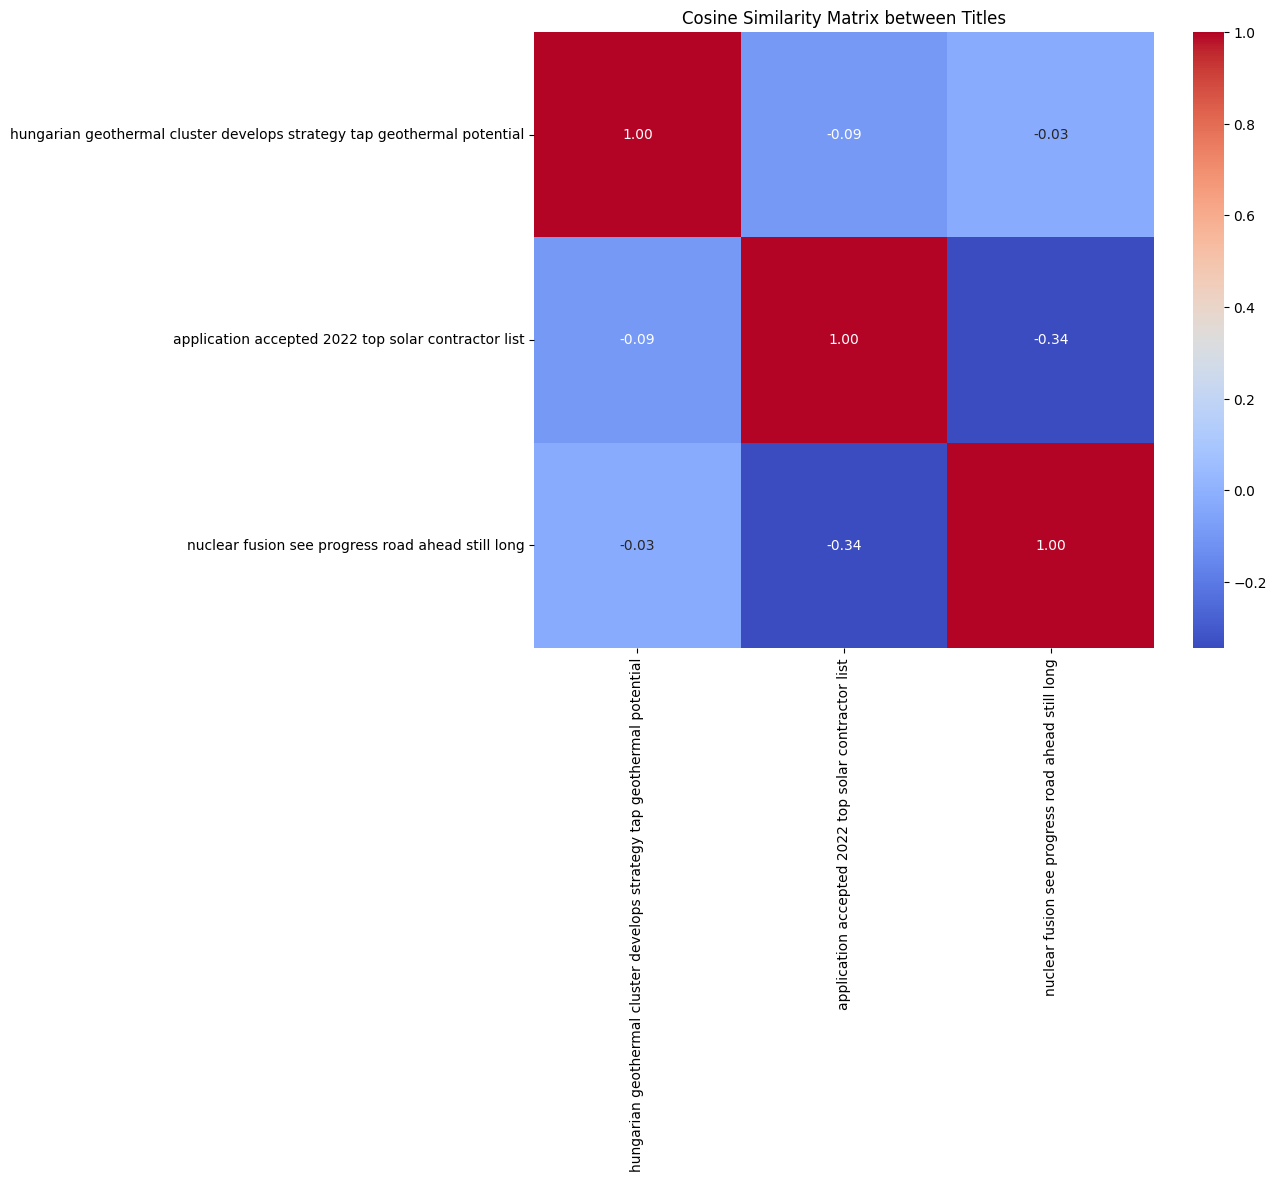

In [58]:
from sklearn.metrics.pairwise import cosine_similarity

# Select a few titles for similarity testing
sample_titles = random.sample(val_titles, 3)

# Infer vectors for the selected titles
sample_vectors = [doc2vec_model.infer_vector(title) for title in sample_titles]

# Calculate cosine similarity
similarity_matrix = cosine_similarity(sample_vectors)

# Display the similarity matrix
print("Cosine Similarity Matrix:")
for i, title in enumerate(sample_titles, start=1):
    print(f"Title {i}: {' '.join(title)}")
print(similarity_matrix)

# Sample titles (as provided in your scenario)
titles = [
    "hungarian geothermal cluster develops strategy tap geothermal potential",
    "application accepted 2022 top solar contractor list",
    "nuclear fusion see progress road ahead still long"
]

# Sample similarity matrix (as provided)
similarity_matrix = [
    [1.00, -0.09416673, -0.02793136],
    [-0.09416673, 1.00, -0.34377128],
    [-0.02793136, -0.34377128, 1.00]
]

# Create a heatmap for the cosine similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=titles, yticklabels=titles)
plt.title("Cosine Similarity Matrix between Titles")
plt.show()

Selected titles do not seem to be closely related to each other, as indicated by the low or slightly negative similarity scores.
The most dissimilar pair is Title 2 and Title 3, which have the lowest similarity score of -0.34377128.
These results suggest that the content or context of the three titles is quite distinct from each other, which is reflected in their low cosine similarity scores.

Next, we apply KMeans clustering with 5 clusters to group similar vectors together. To visualize these clusters in 2D space, we use t-SNE to reduce dimensionality while preserving similarity relationships, and create a scatter plot where data points are colored according to their cluster labels, allowing us to visually identify clusters in the data.

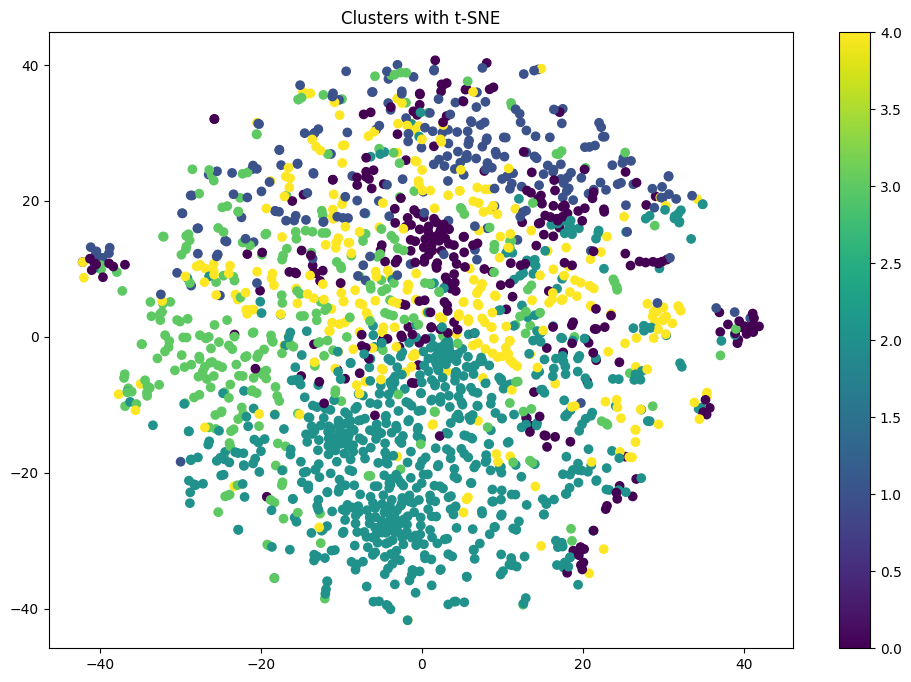

In [64]:
# Infer vectors for all documents in train_titles
doc_vectors = np.array([doc2vec_model.infer_vector(doc.words) for doc in tagged_data])

# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(doc_vectors)
labels = kmeans.labels_

# Visualize the clusters with t-SNE
tsne = TSNE(n_components=2, random_state=42)
doc_vectors_2d = tsne.fit_transform(doc_vectors)

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(doc_vectors_2d[:, 0], doc_vectors_2d[:, 1], c=labels, cmap='viridis')
plt.colorbar()
plt.title("Clusters with t-SNE")
plt.show()

Areas where points are closely packed indicate groups of documents that are very similar to each other. There are distinct clusters that suggest the presence of different topics or themes in your dataset. 

Some clusters are more tightly grouped than others, suggesting that some topics are more consistently discussed in those documents.

There are areas of overlap where clusters are not clearly separated, indicating that some documents share similarities across multiple themes or topics.

# ● Evaluation of Models:

#### o Assess the quality of both word and sentence embeddings using intrinsic evaluation methods, including word similarity and analogy tasks.

#### o Compare the performance of the in-house embeddings to open source embeddings like Word2Vec, GloVe, (or BERT embeddings.)

We undertook a comprehensive assessment of word embeddings, focusing on two main aspects:

#### Word similarity tasks:

We used the most_similar method to discover words closely related to a given word, such as 'energy'. This intrinsic evaluation technique provided insight into how well the models capture semantic relationships.
To quantify this evaluation, we plan to use established word similarity datasets such as WordSim-353 or SimLex-999. These datasets will allow us to calculate Spearman's rank correlation coefficient, which provides a rigorous measure of how closely our model's similarity scores match human judgments.
Analogy tasks:

We conducted analogue tasks using FastText to assess the ability of the models to recognise relational similarities between words. For example, 'coal' is to 'fossil' as 'solar' is to 'cel'. These tasks reveal the models' ability to recognise word relationships.
To formalise this evaluation, we intend to use analogy datasets, such as Google's analogy dataset, and evaluate the accuracy of our models in solving these tasks.
Evaluation of sentence embeddings:

Our investigation extended to sentence embeddings, focusing on two key areas:

#### Cosine similarity:

Cosine similarities for vectors representing different titles allowed us to assess how effectively the models grouped or differentiated documents based on content.
For a more structured evaluation, we aim to use a labelled dataset containing similar and dissimilar pairs of sentences. This evaluation will help us to assess the accuracy of the models in identifying these pairs and their overall performance.

#### Clustering:

Applying KMeans clustering to Doc2Vec vectors, followed by visualisation with t-SNE, provides insight into how well the models group similar documents.
To improve this evaluation, we plan to use labelled data to compute clustering metrics such as the silhouette score or the Davies-Bouldin index.
Comparison with open source embeddings:

#### Comparison with Open Source Embeddings

Our consideration of pre-trained embeddings such as Word2Vec, GloVe, and BERT provided several important insights:

- Pre-trained vs. in-house models: We recognised that while in-house models are tailored to our domain-specific dataset, pre-trained models offer a broader linguistic understanding.

- Contextualised Embeddings (BERT): We recognised the benefits of contextualised embeddings, such as BERT, particularly for tasks where context is critical.

- Domain-specific evaluation: Given the domain-specific language of our dataset, we recognised that in-house models can excel at understanding domain-specific terms and jargon.

- Performance vs. resource utilisation: We considered the resource requirements of pre-trained models and recognised the suitability of in-house models for resource-constrained environments.

### ... We look forward to the final stage of Information Retrieval!